### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
tf.__version__

'1.14.0'

### Collect Data

In [2]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [30]:
print(testY[0:5])

[9 2 1 1 6]


In [56]:
trainX.shape

(60000, 28, 28)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
train_labels = tf.keras.utils.to_categorical(trainY,10)
test_labels = tf.keras.utils.to_categorical(testY,10)

In [48]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
('First 5 examples now are: ', array([9, 0, 0, 3, 0], dtype=uint8))


In [49]:
trainY[0]

9

### Visualize the data

Plot first 10 images in the triaining set and their labels.

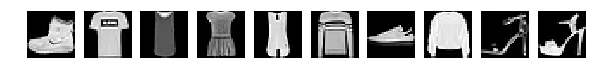

label for each of the above image:
9 0 0 3 0 2 7 2 5 5


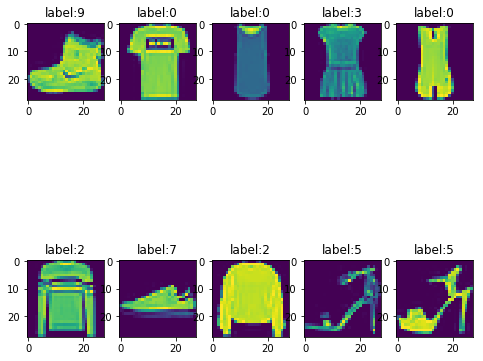

In [24]:
import seaborn as sns

data = trainX[0:10]
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 8))
ax = []
for i in range(10):
  ax.append(fig.add_subplot(2, 5, i+1))
  ax[i].set_title("label:"+ str(trainY[i]))
  plt.imshow(trainX[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
x_train = trainX.astype('float32') / 255
x_test = testX.astype('float32') / 255
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = trainY[5000:], trainY[:5000]

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(testY, 10)

In [58]:
x_train.shape

(55000, 28, 28)

In [59]:
y_train.shape

(55000, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(256, input_shape=(28,28), activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Execute the model using model.fit()

In [72]:
model.fit(x_train, y_train,validation_data=(x_valid,y_valid), epochs=10)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 124us/step - loss: 1.3689 - acc: 0.6484 - val_loss: 0.8974 - val_acc: 0.7306
Epoch 2/10
55000/55000 [==============================] - 7s 129us/step - loss: 0.7877 - acc: 0.7488 - val_loss: 0.6955 - val_acc: 0.7698
Epoch 3/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.6687 - acc: 0.7723 - val_loss: 0.6239 - val_acc: 0.7854
Epoch 4/10
55000/55000 [==============================] - 7s 125us/step - loss: 0.6115 - acc: 0.7893 - val_loss: 0.5743 - val_acc: 0.8052
Epoch 5/10
55000/55000 [==============================] - 7s 122us/step - loss: 0.5746 - acc: 0.8009 - val_loss: 0.5469 - val_acc: 0.8156
Epoch 6/10
55000/55000 [==============================] - 7s 120us/step - loss: 0.5481 - acc: 0.8101 - val_loss: 0.5221 - val_acc: 0.8246
Epoch 7/10
55000/55000 [==============================] - 7s 118us/step - loss: 0.5285 - acc: 0.8157 - val_loss: 0.5060 - v

In [73]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.8149)


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [74]:
model.fit(x_train, y_train, validation_data=(x_valid,y_valid), epochs=10, batch_size=64)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 84us/step - loss: 0.4824 - acc: 0.8314 - val_loss: 0.4691 - val_acc: 0.8378
Epoch 2/10
55000/55000 [==============================] - 5s 84us/step - loss: 0.4780 - acc: 0.8333 - val_loss: 0.4654 - val_acc: 0.8404
Epoch 3/10
55000/55000 [==============================] - 4s 77us/step - loss: 0.4744 - acc: 0.8350 - val_loss: 0.4635 - val_acc: 0.8392
Epoch 4/10
55000/55000 [==============================] - 4s 80us/step - loss: 0.4709 - acc: 0.8352 - val_loss: 0.4598 - val_acc: 0.8382
Epoch 5/10
55000/55000 [==============================] - 5s 83us/step - loss: 0.4674 - acc: 0.8364 - val_loss: 0.4560 - val_acc: 0.8440
Epoch 6/10
55000/55000 [==============================] - 5s 85us/step - loss: 0.4642 - acc: 0.8382 - val_loss: 0.4556 - val_acc: 0.8420
Epoch 7/10
55000/55000 [==============================] - 5s 87us/step - loss: 0.4614 - acc: 0.8389 - val_loss: 0.4518 - val_acc:

### Execute the model

In [76]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.8268)


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [81]:
model.fit(x_train, y_train,validation_data=(x_valid,y_valid), epochs=10)


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 121us/step - loss: 0.4505 - acc: 0.8426 - val_loss: 0.4426 - val_acc: 0.8490
Epoch 2/10
55000/55000 [==============================] - 7s 119us/step - loss: 0.4498 - acc: 0.8434 - val_loss: 0.4426 - val_acc: 0.8480
Epoch 3/10
55000/55000 [==============================] - 7s 120us/step - loss: 0.4494 - acc: 0.8437 - val_loss: 0.4417 - val_acc: 0.8488
Epoch 4/10
55000/55000 [==============================] - 7s 122us/step - loss: 0.4489 - acc: 0.8438 - val_loss: 0.4421 - val_acc: 0.8488
Epoch 5/10
55000/55000 [==============================] - 7s 122us/step - loss: 0.4483 - acc: 0.8434 - val_loss: 0.4412 - val_acc: 0.8508
Epoch 6/10
55000/55000 [==============================] - 7s 122us/step - loss: 0.4479 - acc: 0.8440 - val_loss: 0.4405 - val_acc: 0.8496
Epoch 7/10
55000/55000 [==============================] - 7s 122us/step - loss: 0.4474 - acc: 0.8440 - val_loss: 0.4408 - v

In [84]:
score = model.evaluate(x_test, y_test, verbose=0)
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.8295)


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = Sequential()
model.add(Flatten())
model.add(Dense(100, input_shape=(28,28), activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
# Compile model
sgd = optimizers.SGD(lr=0.03)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [88]:
model.fit(x_train, y_train,validation_data=(x_valid,y_valid), epochs=100, batch_size=64)

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 3s 57us/step - loss: 0.5158 - acc: 0.8167 - val_loss: 0.4945 - val_acc: 0.8272
Epoch 2/100
55000/55000 [==============================] - 3s 56us/step - loss: 0.5019 - acc: 0.8219 - val_loss: 0.4812 - val_acc: 0.8366
Epoch 3/100
55000/55000 [==============================] - 3s 55us/step - loss: 0.4900 - acc: 0.8260 - val_loss: 0.4705 - val_acc: 0.8348
Epoch 4/100
55000/55000 [==============================] - 3s 51us/step - loss: 0.4796 - acc: 0.8290 - val_loss: 0.4640 - val_acc: 0.8414
Epoch 5/100
55000/55000 [==============================] - 3s 51us/step - loss: 0.4703 - acc: 0.8334 - val_loss: 0.4533 - val_acc: 0.8446
Epoch 6/100
55000/55000 [==============================] - 3s 51us/step - loss: 0.4616 - acc: 0.8355 - val_loss: 0.4579 - val_acc: 0.8400
Epoch 7/100
55000/55000 [==============================] - 3s 51us/step - loss: 0.4544 - acc: 0.8383 - val_loss: 0.4403 - v

In [89]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.8716)


## Review model

### Run the model